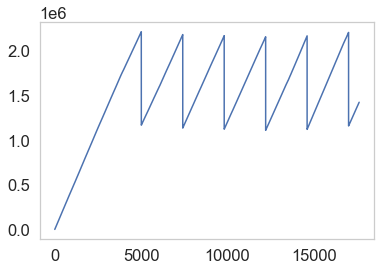

In [50]:
import pandas
import matplotlib.pyplot as plt
usecol = ["Disk_Usage", "Ref_time"]
dataset = pandas.read_csv('kafka_results_wo_compression.csv', usecols=usecol, engine='python')
dataset = dataset.set_index("Ref_time")
#dataset.head(7)
plt.plot(dataset)
plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [18]:
dataframe = pandas.read_csv('kafka_results_wo_compression.csv')
dataframe

,Date_time,CPU,Memory_Bytes,Disk_Usage,Unnamed: 4,Ref_time
0,1629145954,1.437999e+10,458805248,28,NaN,0
1,1629145955,1.582136e+10,386899968,992,NaN,1
2,1629145956,1.772033e+10,489984000,992,NaN,2
3,1629145957,1.900945e+10,395026432,1960,NaN,3
4,1629145958,2.118406e+10,527015936,1960,NaN,4
...,...,...,...,...,...,...
15037,1629163571,2.430000e+13,2858516480,1423348,NaN,17617
15038,1629163572,2.430000e+13,2942160896,1423348,NaN,17618
15039,1629163573,2.430000e+13,2861944832,1424308,NaN,17619
15040,1629163574,2.430000e+13,2964221952,1424308,NaN,17620


In [19]:
data = dataframe.filter(['Disk_Usage'])
# convert the data frame to numpy array
dataset = data.values

training_data_len = math.ceil(len(dataset) * .7)
training_data_len

10530

In [20]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [4.35109942e-04],
       [4.35109942e-04],
       ...,
       [6.42861399e-01],
       [6.42861399e-01],
       [6.43294703e-01]])

In [23]:
# create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# split the data into x_train and y_train
x_train= []
y_train=[]

for i in range (30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 31:
        print(x_train)
        print(y_train)

[array([0.        , 0.00043511, 0.00043511, 0.00087203, 0.00087203,
       0.00130714, 0.00130714, 0.00174044, 0.00235609, 0.00235609,
       0.0027912 , 0.0027912 , 0.00322451, 0.00322451, 0.00365781,
       0.00365781, 0.00409292, 0.00452623, 0.00452623, 0.00495953,
       0.00495953, 0.00539464, 0.00539464, 0.00582795, 0.00582795,
       0.00626125, 0.00669636, 0.00669636, 0.00712966, 0.00712966])]
[0.0075629690746962805]
[array([0.        , 0.00043511, 0.00043511, 0.00087203, 0.00087203,
       0.00130714, 0.00130714, 0.00174044, 0.00235609, 0.00235609,
       0.0027912 , 0.0027912 , 0.00322451, 0.00322451, 0.00365781,
       0.00365781, 0.00409292, 0.00452623, 0.00452623, 0.00495953,
       0.00495953, 0.00539464, 0.00539464, 0.00582795, 0.00582795,
       0.00626125, 0.00669636, 0.00669636, 0.00712966, 0.00712966]), array([0.00043511, 0.00043511, 0.00087203, 0.00087203, 0.00130714,
       0.00130714, 0.00174044, 0.00235609, 0.00235609, 0.0027912 ,
       0.0027912 , 0.00322451, 0

In [26]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(10500, 30, 1)

In [28]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
10500/10500 [==============================] - 118s 11ms/step - loss: 7.4677e-04
Epoch 2/100
10500/10500 [==============================] - 209s 20ms/step - loss: 2.2849e-04
Epoch 3/100
10500/10500 [==============================] - 239s 23ms/step - loss: 2.1516e-04
Epoch 4/100
10500/10500 [==============================] - 225s 21ms/step - loss: 2.1805e-04
Epoch 5/100
10500/10500 [==============================] - 226s 22ms/step - loss: 1.9669e-04
Epoch 6/100
10500/10500 [==============================] - 228s 22ms/step - loss: 1.6089e-04
Epoch 7/100
10500/10500 [==============================] - 226s 22ms/step - loss: 1.7585e-04
Epoch 8/100
10500/10500 [==============================] - 227s 22ms/step - loss: 1.7925e-04
Epoch 9/100
10500/10500 [==============================] - 230s 22ms/step - loss: 1.4557e-04
Epoch 10/100
10500/10500 [==============================] - 229s 22ms/step - loss: 1.6302e-04
Epoch 11/100
10500/10500 [==============================] - 231s 22ms

10500/10500 [==============================] - 164s 16ms/step - loss: 1.0685e-04
Epoch 88/100
10500/10500 [==============================] - 164s 16ms/step - loss: 1.0904e-04
Epoch 89/100
10500/10500 [==============================] - 163s 16ms/step - loss: 1.2013e-04
Epoch 90/100
10500/10500 [==============================] - 164s 16ms/step - loss: 1.0407e-04
Epoch 91/100
10500/10500 [==============================] - 163s 16ms/step - loss: 1.1418e-04
Epoch 92/100
10500/10500 [==============================] - 164s 16ms/step - loss: 1.1810e-04
Epoch 93/100
10500/10500 [==============================] - 164s 16ms/step - loss: 1.1078e-04
Epoch 94/100
10500/10500 [==============================] - 165s 16ms/step - loss: 1.1084e-04
Epoch 95/100
10500/10500 [==============================] - 165s 16ms/step - loss: 1.1249e-04
Epoch 96/100
10500/10500 [==============================] - 165s 16ms/step - loss: 1.1146e-04
Epoch 97/100
10500/10500 [==============================] - 167s 16ms/ste

In [31]:
# create the testing dataset
# array from 10500 to 15042
test_data = scaled_data[training_data_len - 30: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

In [32]:
# convert data to numpy array
x_test = np.array(x_test)

In [33]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
# get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [35]:
# get the root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1883.5165392287233

C:\Users\anush\AppData\Local\Temp/ipykernel_21148/3197375814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


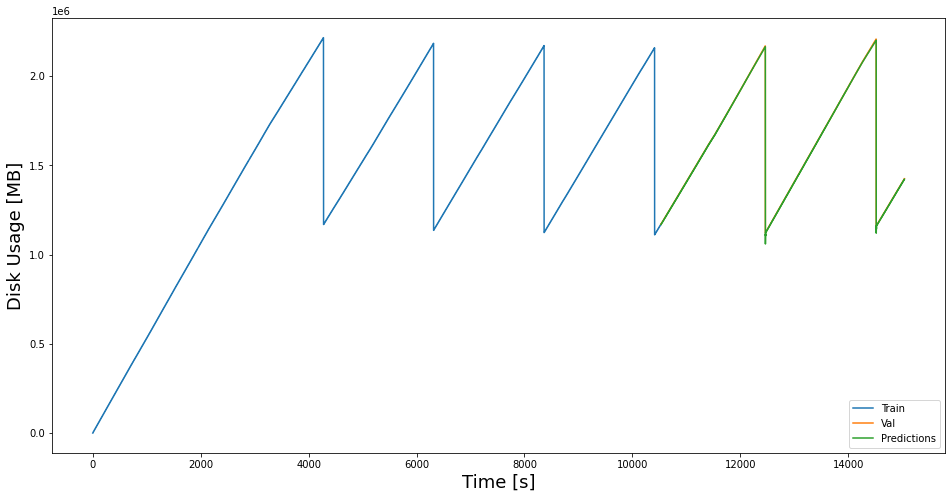

In [38]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize
plt.figure(figsize=(16,8))
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Disk Usage [GB]', fontsize=12)
plt.plot(train['Disk_Usage'])
plt.plot(valid[['Disk_Usage', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [70]:
valid
import csv

with open(r'kafka_lstm_disk_space.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['timeslot', 'disk_space', 'downtime'])

In [71]:
# Get the data
new_df = dataframe.filter(['Disk_Usage'])
new_dataset = new_df.values
length_new_dataset = len(new_dataset)
downtime = 0
previous_value = 0
print(length_new_dataset)
for i in range(30, length_new_dataset):
    last_30_days = new_df[i-30:i].values
    last_30_days_scaled = scaler.transform(last_30_days)
    # create an empty list
    X_test = []
    X_test.append(last_30_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # get the predicted scaled value
    pred_disk_usage = model.predict(X_test)
    #undo scaling
    pred_disk_usage = scaler.inverse_transform(pred_disk_usage)
    difference = pred_disk_usage.item() - previous_value
    
    if difference == 0:
        pass
    elif difference > 0:
        downtime += 1
    else:
        if difference < -800000:
            downtime += 40
        else:
            pass
    
    with open(r'kafka_lstm_disk_space.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow([i, pred_disk_usage, downtime])
    print(pred_disk_usage)
    
    previous_value = pred_disk_usage.item()
    
#last_30_days

15042
[[16940.148]]
[[17759.291]]
[[17856.22]]
[[18685.928]]
[[18782.328]]
[[19604.113]]
[[20668.22]]
[[20563.236]]
[[21386.605]]
[[21520.906]]
[[22341.37]]
[[22438.035]]
[[23265.498]]
[[23361.238]]
[[24190.682]]
[[25255.979]]
[[25149.541]]
[[25974.363]]
[[26108.795]]
[[26931.107]]
[[27026.98]]
[[27857.35]]
[[27953.354]]
[[28783.457]]
[[29852.188]]
[[29743.11]]
[[30566.213]]
[[30700.78]]
[[31529.033]]
[[31626.227]]
[[32456.463]]
[[32552.6]]
[[33380.33]]
[[34455.395]]
[[34346.71]]
[[35170.348]]
[[35305.31]]
[[36131.582]]
[[36227.85]]
[[37064.688]]
[[37160.957]]
[[37989.477]]
[[39062.035]]
[[38952.562]]
[[39782.535]]
[[39918.684]]
[[40744.957]]
[[40841.754]]
[[41676.348]]
[[41772.09]]
[[42607.21]]
[[43682.016]]
[[43570.957]]
[[44398.023]]
[[44533.51]]
[[45367.184]]
[[45464.375]]
[[46298.31]]
[[47376.02]]
[[47265.223]]
[[48098.89]]
[[48236.363]]
[[49065.543]]
[[49162.473]]
[[50005.12]]
[[50100.465]]
[[50934.53]]
[[52012.438]]
[[51900.984]]
[[52735.773]]
[[52872.254]]
[[53703.94]]
[[53798.

[[335127.4]]
[[336033.78]]
[[336157.84]]
[[337063.75]]
[[337131.03]]
[[338046.72]]
[[338115.97]]
[[339022.53]]
[[340188.66]]
[[340006.16]]
[[340918.06]]
[[341042.28]]
[[341947.53]]
[[342012.75]]
[[342925.25]]
[[342993.47]]
[[343906.7]]
[[345074.06]]
[[344888.4]]
[[345797.16]]
[[345920.34]]
[[346831.34]]
[[346896.72]]
[[347807.97]]
[[347875.78]]
[[348784.72]]
[[349957.5]]
[[349771.78]]
[[350679.12]]
[[350801.88]]
[[351709.03]]
[[351773.75]]
[[352690.66]]
[[352757.22]]
[[353665.62]]
[[354839.56]]
[[354653.03]]
[[355561.16]]
[[355682.53]]
[[356590.16]]
[[356654.2]]
[[357572.25]]
[[357637.4]]
[[358546.16]]
[[359716.44]]
[[359528.94]]
[[360442.34]]
[[360563.78]]
[[361474.9]]
[[361537.62]]
[[362451.6]]
[[362516.22]]
[[363430.9]]
[[364601.53]]
[[364411.9]]
[[365321.1]]
[[365441.47]]
[[366354.97]]
[[366416.78]]
[[367329.94]]
[[367394.38]]
[[368304.78]]
[[369481.12]]
[[369290.78]]
[[370199.72]]
[[370319.03]]
[[371228.22]]
[[371289.03]]
[[372208.03]]
[[372271.75]]
[[373181.34]]
[[374354.47]]
[[3

[[657543.1]]
[[657548.]]
[[658499.2]]
[[658508.56]]
[[659447.1]]
[[660669.5]]
[[660414.94]]
[[661335.25]]
[[661391.06]]
[[662331.6]]
[[662336.]]
[[663282.9]]
[[663291.7]]
[[664232.44]]
[[665455.25]]
[[665199.9]]
[[666120.6]]
[[666175.1]]
[[667115.94]]
[[667120.75]]
[[668062.56]]
[[668070.1]]
[[669018.1]]
[[670242.2]]
[[669984.6]]
[[670900.25]]
[[670953.56]]
[[671902.4]]
[[671905.]]
[[672846.94]]
[[674070.7]]
[[673813.6]]
[[674734.2]]
[[674785.94]]
[[675727.9]]
[[675730.3]]
[[676673.]]
[[676679.75]]
[[677628.06]]
[[678854.06]]
[[678594.94]]
[[679511.1]]
[[679563.06]]
[[680512.]]
[[680514.7]]
[[681457.3]]
[[681462.7]]
[[682407.8]]
[[683638.56]]
[[683380.44]]
[[684295.7]]
[[684346.25]]
[[685296.94]]
[[685298.]]
[[686241.8]]
[[686246.3]]
[[687192.06]]
[[688424.8]]
[[688165.06]]
[[689080.]]
[[689129.5]]
[[690076.]]
[[690076.4]]
[[691026.75]]
[[691031.5]]
[[691976.44]]
[[693204.8]]
[[692944.44]]
[[693866.2]]
[[693914.2]]
[[694860.7]]
[[694860.2]]
[[695806.5]]
[[695810.06]]
[[696762.]]
[[6979

[[984011.3]]
[[983968.1]]
[[984965.2]]
[[984922.5]]
[[985932.]]
[[987199.44]]
[[986884.5]]
[[987818.9]]
[[987803.8]]
[[988811.1]]
[[988766.25]]
[[989768.]]
[[989723.7]]
[[990721.9]]
[[991988.8]]
[[991675.9]]
[[992611.1]]
[[992594.56]]
[[993603.3]]
[[993557.5]]
[[994560.06]]
[[994514.8]]
[[995513.6]]
[[996775.56]]
[[996461.56]]
[[997404.44]]
[[997386.44]]
[[998395.1]]
[[998348.4]]
[[999346.5]]
[[1000612.8]]
[[1000298.3]]
[[1001234.25]]
[[1001215.5]]
[[1002226.3]]
[[1002179.]]
[[1003183.2]]
[[1003136.56]]
[[1004137.]]
[[1005399.5]]
[[1005083.3]]
[[1006027.1]]
[[1006008.]]
[[1007017.6]]
[[1006969.75]]
[[1007969.44]]
[[1007922.3]]
[[1008930.4]]
[[1010192.9]]
[[1009874.9]]
[[1010813.5]]
[[1010793.56]]
[[1011811.56]]
[[1011763.1]]
[[1012762.]]
[[1012713.44]]
[[1013722.2]]
[[1014985.06]]
[[1014666.25]]
[[1015605.2]]
[[1015584.44]]
[[1016603.2]]
[[1016554.2]]
[[1017553.6]]
[[1017504.75]]
[[1018508.6]]
[[1019777.06]]
[[1019458.94]]
[[1020397.5]]
[[1020375.3]]
[[1021389.6]]
[[1021340.06]]
[[1022

[[1292648.8]]
[[1292561.2]]
[[1293612.4]]
[[1294858.]]
[[1294515.2]]
[[1295488.8]]
[[1295423.6]]
[[1296492.9]]
[[1296405.1]]
[[1297446.4]]
[[1297356.5]]
[[1298403.4]]
[[1298315.1]]
[[1299366.9]]
[[1299277.9]]
[[1300322.9]]
[[1301567.4]]
[[1301226.5]]
[[1302206.9]]
[[1302141.]]
[[1303203.5]]
[[1303115.1]]
[[1304158.6]]
[[1304068.4]]
[[1305121.2]]
[[1305032.5]]
[[1306077.9]]
[[1307327.5]]
[[1306986.1]]
[[1307960.1]]
[[1307893.6]]
[[1308958.6]]
[[1308870.]]
[[1309919.2]]
[[1309828.6]]
[[1310875.]]
[[1312118.1]]
[[1311777.9]]
[[1312759.2]]
[[1312692.1]]
[[1313756.2]]
[[1313666.4]]
[[1314711.1]]
[[1314620.1]]
[[1315673.9]]
[[1315583.9]]
[[1316630.8]]
[[1316540.2]]
[[1317588.4]]
[[1318836.6]]
[[1318495.1]]
[[1319471.]]
[[1319403.4]]
[[1320469.8]]
[[1320379.8]]
[[1321430.4]]
[[1321338.]]
[[1322385.9]]
[[1322295.]]
[[1323344.1]]
[[1324591.6]]
[[1324250.4]]
[[1325227.]]
[[1325158.4]]
[[1326225.8]]
[[1326135.2]]
[[1327186.4]]
[[1327093.9]]
[[1328142.4]]
[[1329383.4]]
[[1329042.6]]
[[1330026.8]]


[[1599223.1]]
[[1600277.4]]
[[1600186.6]]
[[1601245.8]]
[[1601154.4]]
[[1602207.1]]
[[1603392.8]]
[[1603101.4]]
[[1604106.8]]
[[1604037.5]]
[[1605103.]]
[[1605011.4]]
[[1606062.2]]
[[1605971.9]]
[[1607030.4]]
[[1606939.8]]
[[1607992.]]
[[1607901.9]]
[[1608955.]]
[[1610144.4]]
[[1609854.6]]
[[1610853.9]]
[[1610785.1]]
[[1611851.2]]
[[1611760.5]]
[[1612816.1]]
[[1612725.6]]
[[1613777.6]]
[[1613688.2]]
[[1614746.1]]
[[1614656.4]]
[[1615707.5]]
[[1616889.8]]
[[1616603.1]]
[[1617608.6]]
[[1617540.6]]
[[1618604.2]]
[[1618514.2]]
[[1619563.6]]
[[1619474.9]]
[[1620532.2]]
[[1620443.6]]
[[1621494.2]]
[[1622674.8]]
[[1622390.1]]
[[1623395.2]]
[[1623328.1]]
[[1624390.9]]
[[1624301.6]]
[[1625350.5]]
[[1625262.4]]
[[1626319.]]
[[1626231.1]]
[[1627280.9]]
[[1627193.2]]
[[1628244.4]]
[[1629428.8]]
[[1629146.]]
[[1630144.9]]
[[1630078.5]]
[[1631141.4]]
[[1631053.5]]
[[1632106.6]]
[[1632019.4]]
[[1633068.4]]
[[1632981.8]]
[[1634032.1]]
[[1635214.9]]
[[1634934.5]]
[[1635933.1]]
[[1635867.5]]
[[1636935.]

[[1896560.6]]
[[1896548.]]
[[1897521.5]]
[[1897508.9]]
[[1898487.2]]
[[1898475.4]]
[[1899447.5]]
[[1899436.4]]
[[1900408.9]]
[[1900397.9]]
[[1901374.8]]
[[1901363.9]]
[[1902334.8]]
[[1903417.4]]
[[1903289.2]]
[[1904247.5]]
[[1904252.]]
[[1905224.5]]
[[1905213.5]]
[[1906182.8]]
[[1906174.5]]
[[1907148.2]]
[[1907139.8]]
[[1908108.1]]
[[1908100.4]]
[[1909068.9]]
[[1909061.4]]
[[1910034.1]]
[[1910026.9]]
[[1910993.9]]
[[1910987.5]]
[[1911954.5]]
[[1911948.6]]
[[1912919.6]]
[[1912914.]]
[[1913879.4]]
[[1913874.1]]
[[1914840.]]
[[1914835.]]
[[1915804.6]]
[[1915800.]]
[[1916764.1]]
[[1916760.]]
[[1917724.4]]
[[1917720.8]]
[[1918688.9]]
[[1918685.8]]
[[1919648.6]]
[[1919645.8]]
[[1920613.2]]
[[1920610.6]]
[[1921572.5]]
[[1921570.4]]
[[1922532.5]]
[[1922530.8]]
[[1923496.8]]
[[1923495.5]]
[[1924456.]]
[[1924455.2]]
[[1925415.5]]
[[1925415.]]
[[1926379.6]]
[[1926379.8]]
[[1927338.8]]
[[1927339.1]]
[[1928298.4]]
[[1928299.2]]
[[1929262.2]]
[[1929263.4]]
[[1930221.]]
[[1930222.8]]
[[1931180.5]]
[[

[[2181312.8]]
[[2182099.5]]
[[2182226.2]]
[[2183015.5]]
[[2183143.2]]
[[2183928.2]]
[[2184056.2]]
[[2184840.8]]
[[2184968.5]]
[[2185755.5]]
[[2185884.2]]
[[2186667.5]]
[[2186796.2]]
[[2187581.8]]
[[2188488.]]
[[2188592.]]
[[2189392.5]]
[[2189533.8]]
[[2190317.8]]
[[2190448.8]]
[[2191228.]]
[[2191359.]]
[[2192137.]]
[[2192268.2]]
[[2193048.8]]
[[2193181.2]]
[[2193957.8]]
[[2194090.2]]
[[2194866.2]]
[[2194999.2]]
[[2195777.5]]
[[2195911.]]
[[2196685.2]]
[[2196819.2]]
[[2197592.8]]
[[2197726.8]]
[[2198502.8]]
[[2198637.8]]
[[2199409.8]]
[[2199544.8]]
[[2200316.]]
[[2200451.5]]
[[2201225.]]
[[2201361.2]]
[[2202130.8]]
[[2202267.2]]
[[2203035.8]]
[[2203931.5]]
[[2204048.2]]
[[2204836.5]]
[[2204985.8]]
[[2205753.]]
[[2205891.5]]
[[2206660.]]
[[2206798.8]]
[[2207563.2]]
[[2207702.2]]
[[2208468.8]]
[[2208608.8]]
[[1133482.4]]
[[1156493.1]]
[[1165497.6]]
[[1150344.5]]
[[1168621.6]]
[[1172799.2]]
[[1171225.8]]
[[1169994.9]]
[[1170924.1]]
[[1170921.9]]
[[1171951.2]]
[[1171825.]]
[[1172821.9]]
[[1

[[1425982.8]]
[[1427038.5]]
[[1426941.1]]
[[1427998.]]
[[1427900.6]]
[[1428962.9]]
[[1428865.2]]
[[1429921.]]
[[1429822.9]]
[[1430880.5]]
[[1430782.6]]
[[1431845.2]]
[[1431747.2]]
[[1432803.2]]
[[1432705.5]]
[[1433763.]]
[[1434991.9]]
[[1434659.8]]
[[1435649.5]]
[[1435574.4]]
[[1436649.]]
[[1436551.5]]
[[1437611.]]
[[1437511.8]]
[[1438568.5]]
[[1438470.8]]
[[1439528.2]]
[[1439430.8]]
[[1440493.6]]
[[1440395.2]]
[[1441451.4]]
[[1441353.6]]
[[1442411.4]]
[[1442313.4]]
[[1443376.6]]
[[1443278.1]]
[[1444334.5]]
[[1444236.4]]
[[1445294.2]]
[[1445196.6]]
[[1446259.6]]
[[1446161.2]]
[[1447218.]]
[[1447119.8]]
[[1448183.]]
[[1448085.1]]
[[1449141.5]]
[[1449043.2]]
[[1450101.2]]
[[1450003.5]]
[[1451066.6]]
[[1450968.5]]
[[1452025.1]]
[[1451926.6]]
[[1452984.6]]
[[1454210.1]]
[[1453881.1]]
[[1454872.4]]
[[1454797.]]
[[1455872.]]
[[1455773.9]]
[[1456834.2]]
[[1456735.1]]
[[1457792.1]]
[[1457694.4]]
[[1458757.9]]
[[1458659.5]]
[[1459721.8]]
[[1459623.4]]
[[1460680.2]]
[[1460582.1]]
[[1461640.2]]
[

[[1720854.4]]
[[1721887.9]]
[[1721817.8]]
[[1722852.1]]
[[1722782.6]]
[[1723821.8]]
[[1723752.1]]
[[1724785.]]
[[1725935.1]]
[[1725696.1]]
[[1726694.5]]
[[1726644.6]]
[[1727685.5]]
[[1727615.4]]
[[1728646.9]]
[[1728578.5]]
[[1729616.6]]
[[1729548.2]]
[[1730579.6]]
[[1730511.5]]
[[1731549.1]]
[[1731481.5]]
[[1732512.6]]
[[1732445.2]]
[[1733476.9]]
[[1733410.1]]
[[1734446.5]]
[[1735593.8]]
[[1735358.4]]
[[1736350.4]]
[[1736302.9]]
[[1737347.2]]
[[1737279.]]
[[1738307.2]]
[[1738241.5]]
[[1739271.8]]
[[1739206.5]]
[[1740241.5]]
[[1740176.]]
[[1741204.9]]
[[1741139.6]]
[[1742169.2]]
[[1742104.6]]
[[1743138.9]]
[[1744283.1]]
[[1744052.5]]
[[1745043.4]]
[[1744998.]]
[[1746039.2]]
[[1745973.8]]
[[1746999.8]]
[[1746936.]]
[[1747964.2]]
[[1747901.1]]
[[1748933.5]]
[[1748870.6]]
[[1749897.2]]
[[1749834.4]]
[[1750861.8]]
[[1751953.4]]
[[1751784.9]]
[[1752781.]]
[[1752728.9]]
[[1753761.]]
[[1753698.5]]
[[1754728.8]]
[[1754667.1]]
[[1755692.4]]
[[1755631.1]]
[[1756661.8]]
[[1756600.4]]
[[1757625.]]


[[2018256.8]]
[[2018299.8]]
[[2019207.4]]
[[2019250.9]]
[[2020162.]]
[[2020206.1]]
[[2021112.1]]
[[2022133.8]]
[[2022099.]]
[[2023007.2]]
[[2023064.4]]
[[2023968.4]]
[[2024013.2]]
[[2024917.1]]
[[2024963.2]]
[[2025870.6]]
[[2025917.5]]
[[2026819.9]]
[[2026867.1]]
[[2027769.5]]
[[2027817.2]]
[[2028722.8]]
[[2028771.2]]
[[2029671.9]]
[[2029720.6]]
[[2030620.9]]
[[2031640.9]]
[[2031614.5]]
[[2032513.4]]
[[2032574.8]]
[[2033481.5]]
[[2033531.1]]
[[2034432.2]]
[[2034483.5]]
[[2035380.4]]
[[2035431.9]]
[[2036328.5]]
[[2036380.5]]
[[2037280.6]]
[[2037333.4]]
[[2038228.5]]
[[2038281.5]]
[[2039180.4]]
[[2040191.]]
[[2040171.4]]
[[2041066.2]]
[[2041131.8]]
[[2042028.6]]
[[2042082.6]]
[[2042974.8]]
[[2043029.8]]
[[2043921.5]]
[[2043977.2]]
[[2044872.2]]
[[2044928.5]]
[[2045818.8]]
[[2045875.8]]
[[2046765.4]]
[[2046822.8]]
[[2047715.9]]
[[2048721.5]]
[[2048709.]]
[[2049599.4]]
[[2049669.2]]
[[2050560.5]]
[[2050618.8]]
[[2051504.8]]
[[2051564.4]]
[[2052450.2]]
[[2052510.5]]
[[2053399.6]]
[[2053460.

[[1270510.8]]
[[1271559.4]]
[[1271473.]]
[[1272515.1]]
[[1272429.1]]
[[1273472.6]]
[[1273387.1]]
[[1274435.8]]
[[1275683.9]]
[[1275341.1]]
[[1276312.2]]
[[1276249.2]]
[[1277316.1]]
[[1277230.]]
[[1278268.9]]
[[1278181.4]]
[[1279225.9]]
[[1279139.8]]
[[1280189.4]]
[[1280102.5]]
[[1281145.5]]
[[1281058.4]]
[[1282102.8]]
[[1282016.]]
[[1283066.2]]
[[1282979.]]
[[1284022.2]]
[[1285274.5]]
[[1284933.4]]
[[1285904.4]]
[[1285840.1]]
[[1286902.2]]
[[1286815.9]]
[[1287862.8]]
[[1287774.2]]
[[1288818.2]]
[[1288730.9]]
[[1289775.6]]
[[1289688.5]]
[[1290739.4]]
[[1290651.2]]
[[1291695.2]]
[[1291607.1]]
[[1292652.9]]
[[1292565.1]]
[[1293616.1]]
[[1294861.8]]
[[1294519.2]]
[[1295493.]]
[[1295427.6]]
[[1296497.]]
[[1296409.]]
[[1297450.5]]
[[1297360.8]]
[[1298407.]]
[[1298318.9]]
[[1299370.8]]
[[1299282.]]
[[1300326.8]]
[[1300238.1]]
[[1301284.5]]
[[1301195.6]]
[[1302248.]]
[[1302158.8]]
[[1303204.4]]
[[1304448.6]]
[[1304107.5]]
[[1305088.1]]
[[1305021.8]]
[[1306085.]]
[[1305996.5]]
[[1307045.5]]
[[1

[[1572333.6]]
[[1572238.9]]
[[1573297.6]]
[[1573203.2]]
[[1574258.2]]
[[1574164.6]]
[[1575220.9]]
[[1575127.2]]
[[1576188.4]]
[[1576094.5]]
[[1577149.2]]
[[1577055.8]]
[[1578111.8]]
[[1578018.5]]
[[1579079.1]]
[[1578985.8]]
[[1580040.1]]
[[1579947.]]
[[1581002.5]]
[[1580909.8]]
[[1581970.1]]
[[1581876.9]]
[[1582931.1]]
[[1582838.2]]
[[1583893.9]]
[[1583800.9]]
[[1584861.6]]
[[1584768.5]]
[[1585822.5]]
[[1585729.9]]
[[1586785.1]]
[[1587980.2]]
[[1587683.1]]
[[1588682.4]]
[[1588611.5]]
[[1589685.2]]
[[1589592.1]]
[[1590642.9]]
[[1590550.6]]
[[1591605.8]]
[[1591513.9]]
[[1592574.]]
[[1592481.5]]
[[1593534.8]]
[[1593442.9]]
[[1594497.6]]
[[1594405.9]]
[[1595465.1]]
[[1595373.6]]
[[1596427.1]]
[[1596335.]]
[[1597389.4]]
[[1597298.1]]
[[1598357.5]]
[[1599544.1]]
[[1599250.1]]
[[1600249.9]]
[[1600180.6]]
[[1601253.2]]
[[1601160.8]]
[[1602211.1]]
[[1602119.9]]
[[1603173.8]]
[[1603083.5]]
[[1604142.]]
[[1604051.2]]
[[1605103.1]]
[[1605012.9]]
[[1606066.4]]
[[1605975.9]]
[[1607034.5]]
[[1608218.

[[1871496.8]]
[[1872481.1]]
[[1872459.]]
[[1873448.1]]
[[1873426.1]]
[[1874409.8]]
[[1874388.2]]
[[1875372.1]]
[[1875351.]]
[[1876339.]]
[[1876318.1]]
[[1877300.5]]
[[1877280.1]]
[[1878263.]]
[[1878243.]]
[[1879229.8]]
[[1879209.9]]
[[1880191.]]
[[1880172.]]
[[1881153.]]
[[1882249.4]]
[[1882105.8]]
[[1883065.9]]
[[1883062.2]]
[[1884045.4]]
[[1884025.8]]
[[1885009.5]]
[[1884992.1]]
[[1885970.8]]
[[1885953.8]]
[[1886932.5]]
[[1886915.9]]
[[1887899.]]
[[1887882.9]]
[[1888860.]]
[[1888844.2]]
[[1889821.8]]
[[1889806.4]]
[[1890787.6]]
[[1890772.8]]
[[1891748.8]]
[[1891734.1]]
[[1892710.4]]
[[1892696.]]
[[1893676.5]]
[[1893662.4]]
[[1894637.4]]
[[1894624.]]
[[1895598.6]]
[[1895585.6]]
[[1896564.6]]
[[1896552.]]
[[1897525.6]]
[[1898614.5]]
[[1898482.8]]
[[1899437.2]]
[[1899440.1]]
[[1900415.2]]
[[1900402.5]]
[[1901378.6]]
[[1901367.9]]
[[1902339.1]]
[[1902329.]]
[[1903300.]]
[[1903290.2]]
[[1904265.8]]
[[1904256.1]]
[[1905225.8]]
[[1905216.6]]
[[1906186.9]]
[[1906178.1]]
[[1907151.9]]
[[19071

[[2165595.8]]
[[2166522.5]]
[[1062449.2]]
[[1088635.]]
[[1117746.2]]
[[1107301.5]]
[[1123067.2]]
[[1127829.1]]
[[1125258.5]]
[[1125573.6]]
[[1125634.]]
[[1126785.2]]
[[1126746.4]]
[[1127756.4]]
[[1127683.6]]
[[1128711.5]]
[[1128652.8]]
[[1129680.]]
[[1129616.1]]
[[1130646.]]
[[1131908.]]
[[1131575.2]]
[[1132527.8]]
[[1132486.]]
[[1133529.4]]
[[1133462.2]]
[[1134481.8]]
[[1134413.4]]
[[1135437.2]]
[[1135370.5]]
[[1136399.8]]
[[1136332.6]]
[[1137355.2]]
[[1137287.9]]
[[1138312.2]]
[[1138245.]]
[[1139274.8]]
[[1140534.5]]
[[1140199.9]]
[[1141153.2]]
[[1141110.]]
[[1142154.]]
[[1142086.2]]
[[1143106.2]]
[[1143036.9]]
[[1144067.8]]
[[1143999.6]]
[[1145023.4]]
[[1144954.6]]
[[1145980.1]]
[[1145911.9]]
[[1146942.5]]
[[1146874.1]]
[[1147898.]]
[[1147829.2]]
[[1148854.9]]
[[1150120.2]]
[[1149786.]]
[[1150738.8]]
[[1150693.6]]
[[1151734.1]]
[[1151665.1]]
[[1152693.6]]
[[1152622.9]]
[[1153648.2]]
[[1153578.4]]
[[1154605.]]
[[1154535.4]]
[[1155567.6]]
[[1155497.2]]
[[1156523.1]]
[[1156452.9]]
[[11

[[1419258.2]]
[[1420315.2]]
[[1420217.9]]
[[1421279.9]]
[[1421182.1]]
[[1422237.9]]
[[1423463.]]
[[1423129.9]]
[[1424125.1]]
[[1424050.4]]
[[1425123.2]]
[[1425025.8]]
[[1426085.]]
[[1425986.4]]
[[1427042.4]]
[[1426945.1]]
[[1428002.]]
[[1427904.6]]
[[1428967.]]
[[1428869.1]]
[[1429925.]]
[[1429827.2]]
[[1430884.5]]
[[1432114.]]
[[1431781.6]]
[[1432770.8]]
[[1432695.8]]
[[1433770.4]]
[[1433672.8]]
[[1434732.4]]
[[1434633.5]]
[[1435689.8]]
[[1435592.4]]
[[1436649.6]]
[[1436552.]]
[[1437614.6]]
[[1437516.4]]
[[1438572.6]]
[[1438474.6]]
[[1439532.1]]
[[1439434.4]]
[[1440497.5]]
[[1441719.2]]
[[1441387.1]]
[[1442378.6]]
[[1442303.8]]
[[1443384.]]
[[1443286.1]]
[[1444339.1]]
[[1444240.]]
[[1445298.1]]
[[1445200.6]]
[[1446263.6]]
[[1446165.4]]
[[1447221.9]]
[[1447123.8]]
[[1448187.]]
[[1448089.1]]
[[1449145.5]]
[[1450365.9]]
[[1450036.6]]
[[1451034.2]]
[[1450959.]]
[[1452032.5]]
[[1451934.4]]
[[1452989.]]
[[1452890.4]]
[[1453954.]]
[[1453856.]]
[[1454912.9]]
[[1454814.8]]
[[1455872.8]]
[[1455

[[1722076.]]
[[1721833.8]]
[[1722827.4]]
[[1722776.8]]
[[1723824.6]]
[[1723753.6]]
[[1724785.]]
[[1724715.8]]
[[1725749.6]]
[[1725680.6]]
[[1726719.1]]
[[1726650.1]]
[[1727682.2]]
[[1727614.]]
[[1728647.]]
[[1728578.6]]
[[1729616.4]]
[[1730765.]]
[[1730527.]]
[[1731524.9]]
[[1731476.]]
[[1732515.8]]
[[1732446.6]]
[[1733476.9]]
[[1733409.9]]
[[1734446.5]]
[[1734379.8]]
[[1735409.9]]
[[1735343.4]]
[[1736374.6]]
[[1736308.2]]
[[1737344.]]
[[1737277.8]]
[[1738307.5]]
[[1739453.2]]
[[1739221.1]]
[[1740217.9]]
[[1740170.6]]
[[1741207.8]]
[[1741141.1]]
[[1742169.1]]
[[1742104.6]]
[[1743138.9]]
[[1743073.9]]
[[1744102.2]]
[[1744038.2]]
[[1745066.6]]
[[1745003.]]
[[1746036.2]]
[[1745972.2]]
[[1746999.8]]
[[1746936.1]]
[[1747964.2]]
[[1749111.8]]
[[1748884.5]]
[[1749874.1]]
[[1749829.5]]
[[1750864.8]]
[[1750800.5]]
[[1751831.4]]
[[1751768.8]]
[[1752794.9]]
[[1752732.5]]
[[1753759.2]]
[[1753697.6]]
[[1754728.6]]
[[1754667.1]]
[[1755692.4]]
[[1755631.1]]
[[1756661.8]]
[[1757801.4]]
[[1757578.1]]
[

[[2022062.8]]
[[2023087.4]]
[[2023053.8]]
[[2022982.2]]
[[2023977.4]]
[[2024997.8]]
[[2024953.]]
[[2025859.2]]
[[2025919.1]]
[[2026821.6]]
[[2026867.5]]
[[2027769.8]]
[[2027817.6]]
[[2028723.]]
[[2028771.2]]
[[2029671.9]]
[[2029720.6]]
[[2030620.9]]
[[2030670.2]]
[[2031574.]]
[[2031623.9]]
[[2032522.8]]
[[2032572.9]]
[[2033479.4]]
[[2033530.5]]
[[2034431.8]]
[[2034483.]]
[[2035380.1]]
[[2035431.9]]
[[2036328.5]]
[[2036380.5]]
[[2037280.4]]
[[2037333.2]]
[[2038228.5]]
[[2038281.5]]
[[2039180.4]]
[[2039234.1]]
[[2040127.9]]
[[2040181.9]]
[[2041075.5]]
[[2041129.9]]
[[2042026.8]]
[[2042082.]]
[[2042974.]]
[[2043029.4]]
[[2043921.2]]
[[2043977.1]]
[[2044872.1]]
[[2044928.5]]
[[2045818.6]]
[[2045875.9]]
[[2046765.4]]
[[2046822.8]]
[[2047715.8]]
[[2047774.]]
[[2048662.1]]
[[2048720.8]]
[[2049608.4]]
[[2049667.1]]
[[2050558.4]]
[[2050618.1]]
[[2051504.4]]
[[2051563.9]]
[[2052450.]]
[[2053456.5]]
[[2053448.4]]
[[2054336.]]
[[2054408.2]]
[[2055292.1]]
[[2055352.9]]
[[2056239.9]]
[[2056302.]]
[[

[[1269592.9]]
[[1270563.]]
[[1270500.9]]
[[1271566.8]]
[[1271481.4]]
[[1272520.1]]
[[1272432.8]]
[[1273476.4]]
[[1273390.9]]
[[1274439.9]]
[[1274353.6]]
[[1275395.5]]
[[1275309.5]]
[[1276353.1]]
[[1276267.2]]
[[1277316.2]]
[[1277229.9]]
[[1278272.8]]
[[1279519.9]]
[[1279178.8]]
[[1280156.2]]
[[1280092.4]]
[[1281152.9]]
[[1281066.5]]
[[1282107.2]]
[[1282019.9]]
[[1283070.1]]
[[1282983.]]
[[1284026.2]]
[[1283938.8]]
[[1284989.1]]
[[1284902.]]
[[1285945.4]]
[[1285858.1]]
[[1286903.1]]
[[1286815.9]]
[[1287866.1]]
[[1289112.4]]
[[1288770.1]]
[[1289742.6]]
[[1289678.6]]
[[1290746.5]]
[[1290659.6]]
[[1291700.1]]
[[1291610.9]]
[[1292656.8]]
[[1292569.6]]
[[1293620.5]]
[[1293532.]]
[[1294576.2]]
[[1294488.]]
[[1295534.1]]
[[1295446.]]
[[1296497.5]]
[[1296408.6]]
[[1297453.8]]
[[1298698.6]]
[[1298357.4]]
[[1299337.6]]
[[1299271.9]]
[[1300334.2]]
[[1300246.2]]
[[1301289.2]]
[[1301199.2]]
[[1302251.8]]
[[1302163.]]
[[1303208.4]]
[[1303119.1]]
[[1304166.1]]
[[1304077.2]]
[[1305129.5]]
[[1305040.4]]

[[1569348.2]]
[[1570407.1]]
[[1570312.6]]
[[1571367.6]]
[[1571273.9]]
[[1572330.]]
[[1572236.4]]
[[1573297.8]]
[[1573203.6]]
[[1574258.4]]
[[1574164.5]]
[[1575220.9]]
[[1576419.]]
[[1576118.]]
[[1577116.9]]
[[1577045.4]]
[[1578115.1]]
[[1578021.]]
[[1579079.1]]
[[1578985.5]]
[[1580040.2]]
[[1579947.]]
[[1581002.6]]
[[1580909.8]]
[[1581970.]]
[[1581877.]]
[[1582931.2]]
[[1582838.2]]
[[1583893.8]]
[[1585089.6]]
[[1584791.6]]
[[1585790.4]]
[[1585719.8]]
[[1586788.6]]
[[1586695.4]]
[[1587752.9]]
[[1587659.9]]
[[1588714.1]]
[[1588621.8]]
[[1589681.8]]
[[1589589.5]]
[[1590643.]]
[[1590550.9]]
[[1591605.8]]
[[1591513.6]]
[[1592573.8]]
[[1593761.6]]
[[1593465.6]]
[[1594466.]]
[[1594395.9]]
[[1595468.9]]
[[1595376.1]]
[[1596427.]]
[[1596335.]]
[[1597389.2]]
[[1597298.1]]
[[1598357.5]]
[[1598265.5]]
[[1599318.9]]
[[1599227.6]]
[[1600281.4]]
[[1600190.4]]
[[1601249.8]]
[[1602435.5]]
[[1602142.6]]
[[1603142.6]]
[[1603073.5]]
[[1604145.4]]
[[1604053.6]]
[[1605103.1]]
[[1605012.5]]
[[1606066.4]]
[[1

[[1875356.5]]
[[1875350.2]]
[[1876341.6]]
[[1876318.9]]
[[1877300.5]]
[[1877280.1]]
[[1878263.1]]
[[1879360.5]]
[[1879215.]]
[[1880175.8]]
[[1880171.]]
[[1881155.4]]
[[1881134.8]]
[[1882119.4]]
[[1882101.2]]
[[1883081.2]]
[[1884171.8]]
[[1884029.9]]
[[1884994.4]]
[[1884991.6]]
[[1885973.]]
[[1885954.6]]
[[1886932.6]]
[[1886916.1]]
[[1887899.1]]
[[1887882.9]]
[[1888860.]]
[[1889948.2]]
[[1889810.6]]
[[1890772.9]]
[[1890772.4]]
[[1891751.2]]
[[1891734.9]]
[[1892710.4]]
[[1892696.2]]
[[1893676.6]]
[[1894762.8]]
[[1894627.8]]
[[1895584.1]]
[[1895585.2]]
[[1896566.9]]
[[1896552.6]]
[[1897525.6]]
[[1897513.1]]
[[1898491.4]]
[[1898479.5]]
[[1899451.5]]
[[1900535.1]]
[[1900405.2]]
[[1901364.2]]
[[1901367.6]]
[[1902341.4]]
[[1902329.5]]
[[1903300.1]]
[[1903290.4]]
[[1904265.8]]
[[1904256.1]]
[[1905225.8]]
[[1906306.8]]
[[1906181.]]
[[1907137.9]]
[[1907143.6]]
[[1908114.5]]
[[1908104.9]]
[[1909073.1]]
[[1909065.5]]
[[1910038.2]]
[[1911116.8]]
[[1910994.]]
[[1911944.8]]
[[1911952.4]]
[[1912926.]]

[[1143280.4]]
[[1144062.5]]
[[1145265.5]]
[[1144983.6]]
[[1145953.2]]
[[1145904.1]]
[[1146946.6]]
[[1146877.6]]
[[1147898.9]]
[[1147829.]]
[[1148854.8]]
[[1150120.]]
[[1149786.]]
[[1150738.9]]
[[1150693.2]]
[[1151734.2]]
[[1151665.1]]
[[1152693.8]]
[[1152622.9]]
[[1153648.2]]
[[1154906.9]]
[[1154572.6]]
[[1155533.9]]
[[1155487.2]]
[[1156527.1]]
[[1156457.1]]
[[1157481.1]]
[[1157409.8]]
[[1158442.8]]
[[1159701.2]]
[[1159365.2]]
[[1160320.9]]
[[1160274.]]
[[1161321.6]]
[[1161251.2]]
[[1162274.1]]
[[1162201.4]]
[[1163230.]]
[[1164494.6]]
[[1164158.5]]
[[1165114.1]]
[[1165066.2]]
[[1166114.5]]
[[1166043.2]]
[[1167067.5]]
[[1166994.]]
[[1168023.4]]
[[1169287.2]]
[[1168951.5]]
[[1169906.8]]
[[1169858.1]]
[[1170902.4]]
[[1170830.5]]
[[1171862.]]
[[1171787.9]]
[[1172816.4]]
[[1174074.4]]
[[1173738.4]]
[[1174701.5]]
[[1174651.8]]
[[1175695.6]]
[[1175622.9]]
[[1176649.8]]
[[1176575.1]]
[[1177611.4]]
[[1177537.8]]
[[1178567.1]]
[[1179824.1]]
[[1179487.6]]
[[1180451.8]]
[[1180401.1]]
[[1181445.8]]

[[1459015.1]]
[[1458687.1]]
[[1459685.8]]
[[1459610.]]
[[1460683.8]]
[[1460585.4]]
[[1461640.5]]
[[1461541.6]]
[[1462605.8]]
[[1463823.8]]
[[1463494.9]]
[[1464488.1]]
[[1464413.1]]
[[1465493.6]]
[[1465395.]]
[[1466448.9]]
[[1466349.8]]
[[1467408.6]]
[[1468631.5]]
[[1468304.4]]
[[1469297.]]
[[1469221.6]]
[[1470297.]]
[[1470198.9]]
[[1471259.4]]
[[1471160.1]]
[[1472217.5]]
[[1472119.4]]
[[1473183.8]]
[[1474398.9]]
[[1474072.1]]
[[1475066.2]]
[[1474991.]]
[[1476071.9]]
[[1475973.1]]
[[1477027.]]
[[1476928.]]
[[1477987.4]]
[[1479207.9]]
[[1478883.]]
[[1479876.2]]
[[1479800.8]]
[[1480876.1]]
[[1480777.6]]
[[1481838.6]]
[[1481739.4]]
[[1482796.9]]
[[1484010.8]]
[[1483687.2]]
[[1484688.]]
[[1484612.2]]
[[1485686.2]]
[[1485587.8]]
[[1486643.1]]
[[1486544.2]]
[[1487609.]]
[[1488821.5]]
[[1488497.5]]
[[1489493.1]]
[[1489417.9]]
[[1490497.9]]
[[1490399.6]]
[[1491454.]]
[[1491355.]]
[[1492414.]]
[[1493631.5]]
[[1493309.5]]
[[1494304.1]]
[[1494228.5]]
[[1495309.1]]
[[1495210.6]]
[[1496264.9]]
[[149

[[1773991.2]]
[[1775009.2]]
[[1774953.8]]
[[1775974.]]
[[1777111.9]]
[[1776900.4]]
[[1777885.5]]
[[1777848.1]]
[[1778879.1]]
[[1778822.6]]
[[1779839.4]]
[[1779785.2]]
[[1780804.1]]
[[1781940.4]]
[[1781731.5]]
[[1782715.5]]
[[1782679.6]]
[[1783703.9]]
[[1783649.4]]
[[1784670.2]]
[[1784617.4]]
[[1785634.]]
[[1786763.4]]
[[1786557.8]]
[[1787546.8]]
[[1787511.9]]
[[1788533.6]]
[[1788480.1]]
[[1789495.4]]
[[1789444.]]
[[1790464.5]]
[[1791592.4]]
[[1791388.6]]
[[1792371.8]]
[[1792338.4]]
[[1793364.1]]
[[1793312.2]]
[[1794324.4]]
[[1794274.5]]
[[1795289.1]]
[[1796420.1]]
[[1796219.9]]
[[1797201.2]]
[[1797169.4]]
[[1798188.4]]
[[1798138.1]]
[[1799154.5]]
[[1799106.2]]
[[1800118.2]]
[[1801242.4]]
[[1801045.4]]
[[1802031.2]]
[[1802000.6]]
[[1803017.4]]
[[1802968.2]]
[[1803983.8]]
[[1803936.8]]
[[1804947.2]]
[[1806069.4]]
[[1805875.2]]
[[1806860.4]]
[[1806831.2]]
[[1807846.]]
[[1807798.8]]
[[1808807.4]]
[[1808762.2]]
[[1809776.5]]
[[1810896.9]]
[[1810704.9]]
[[1811684.1]]
[[1811656.4]]
[[1812675.

[[2087453.2]]
[[2088318.]]
[[2089297.5]]
[[2089319.4]]
[[2090187.]]
[[2090277.4]]
[[2091139.8]]
[[2091219.2]]
[[2092077.1]]
[[2092157.6]]
[[2093014.9]]
[[2093095.8]]
[[2093956.2]]
[[2094038.1]]
[[2094901.5]]
[[2094984.1]]
[[2095846.5]]
[[2095930.]]
[[2096788.]]
[[2096871.5]]
[[2097725.8]]
[[2097809.]]
[[2098662.5]]
[[2098746.8]]
[[2099603.]]
[[2100575.2]]
[[2100606.5]]
[[2101467.]]
[[2101563.2]]
[[2102417.]]
[[2102502.8]]
[[2103352.2]]
[[2103438.5]]
[[2104287.5]]
[[2104374.5]]
[[2105226.5]]
[[2105314.]]
[[2106161.8]]
[[2106249.8]]
[[2107096.8]]
[[2107185.2]]
[[2108035.2]]
[[2108124.5]]
[[2108970.]]
[[2109059.2]]
[[2109904.2]]
[[2109994.2]]
[[2110842.]]
[[2111806.8]]
[[2111847.5]]
[[2112701.]]
[[2112803.]]
[[2113648.5]]
[[2113739.8]]
[[2114581.2]]
[[2114673.2]]
[[2115514.]]
[[2115606.5]]
[[2116450.]]
[[2116543.5]]
[[2117382.8]]
[[2117476.2]]
[[2118318.8]]
[[2118413.2]]
[[2119251.]]
[[2119345.8]]
[[2120182.8]]
[[2120278.]]
[[2121118.]]
[[2121214.2]]
[[2122049.5]]
[[2123006.]]
[[2123056.2

[[1339663.5]]
[[1340908.6]]
[[1340568.]]
[[1341546.5]]
[[1341476.9]]
[[1342545.6]]
[[1342453.5]]
[[1343506.5]]
[[1343412.4]]
[[1344462.1]]
[[1344369.6]]
[[1345421.1]]
[[1345328.1]]
[[1346384.8]]
[[1346291.6]]
[[1347341.2]]
[[1347248.]]
[[1348299.6]]
[[1348206.8]]
[[1349263.4]]
[[1350501.]]
[[1350160.2]]
[[1351140.8]]
[[1351071.]]
[[1352145.9]]
[[1352052.9]]
[[1353099.8]]
[[1353005.1]]
[[1354063.]]
[[1353969.6]]
[[1355020.]]
[[1354926.1]]
[[1355978.5]]
[[1355884.5]]
[[1356942.1]]
[[1356848.5]]
[[1357898.8]]
[[1357804.8]]
[[1358857.4]]
[[1360099.6]]
[[1359760.]]
[[1360741.]]
[[1360670.]]
[[1361739.9]]
[[1361646.5]]
[[1362701.2]]
[[1362605.9]]
[[1363657.4]]
[[1363563.5]]
[[1364616.1]]
[[1364521.9]]
[[1365580.]]
[[1365485.5]]
[[1366537.]]
[[1366442.5]]
[[1367495.5]]
[[1367400.9]]
[[1368459.9]]
[[1369694.]]
[[1369354.2]]
[[1370337.5]]
[[1370266.1]]
[[1371343.]]
[[1371248.1]]
[[1372297.]]
[[1372200.9]]
[[1373254.8]]
[[1373160.2]]
[[1374219.4]]
[[1374123.9]]
[[1375176.1]]
[[1375080.9]]
[[1376

In [66]:
model.save("kafka_neural_network.h5")

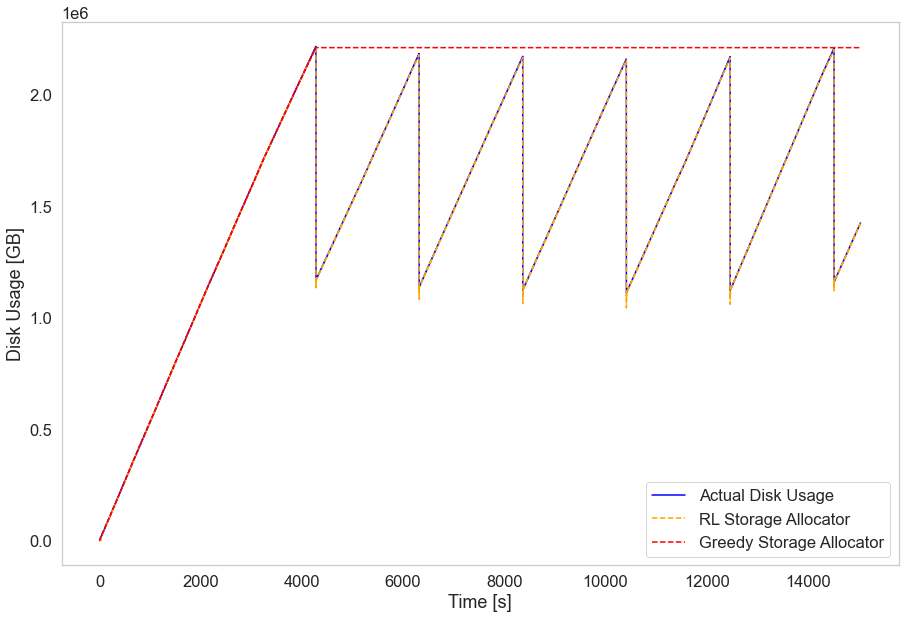

In [114]:
import seaborn as sns
usecol = ["actual_value", "timeslot", "rl_storage_allocation", "greedy_storage_allocation"]
predicted_usage_data = pandas.read_csv('kafka_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)

plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Disk Usage [GB]')
plt.plot(predicted_usage_data['actual_value'], color='blue')
plt.plot(predicted_usage_data['rl_storage_allocation'], linestyle='--', color='orange')
plt.plot(predicted_usage_data['greedy_storage_allocation'], linestyle='--', color='red')
plt.legend(['Actual Disk Usage', 'RL Storage Allocator', 'Greedy Storage Allocator'], loc='lower right')
#plt.plot(predicted_usage_data)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_storage_allocation.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_storage_allocation.pdf", dpi = 300)
plt.show()

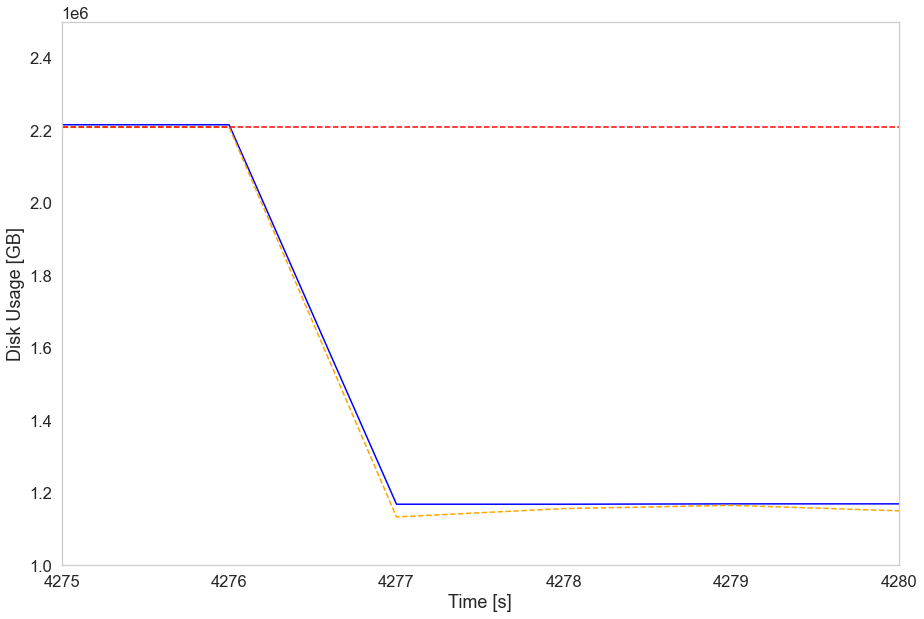

In [115]:
usecol = ["actual_value", "timeslot", "rl_storage_allocation", "greedy_storage_allocation"]
predicted_usage_data = pandas.read_csv('kafka_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Disk Usage [GB]')
plt.plot(predicted_usage_data['actual_value'], color='blue')
plt.plot(predicted_usage_data['rl_storage_allocation'], linestyle='--', color='orange')
plt.plot(predicted_usage_data['greedy_storage_allocation'], linestyle='--', color='red')
#plt.plot(predicted_usage_data)
plt.ylim(1000000, 2500000)
plt.xlim(4275, 4280)
plt.show()

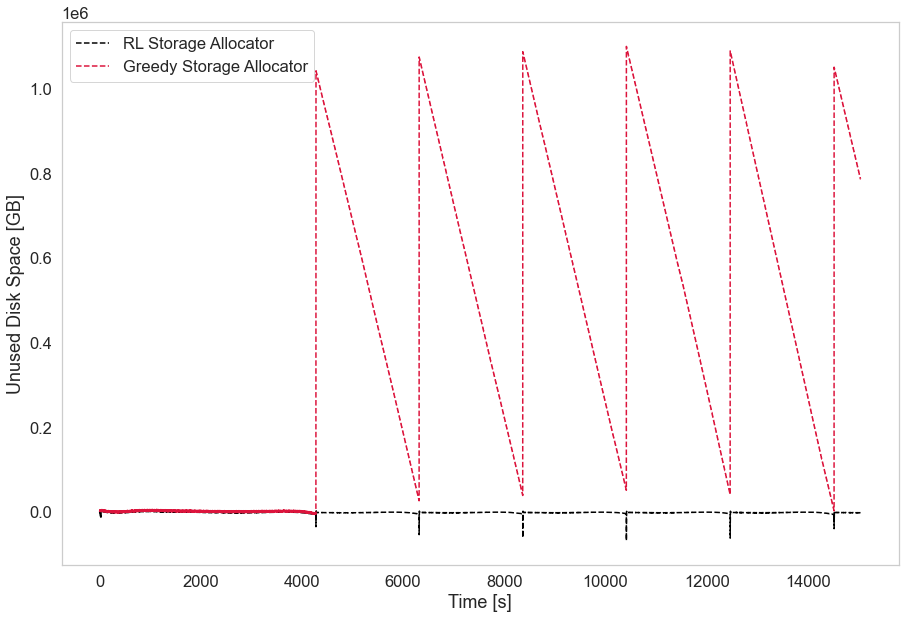

In [116]:
usecol = ["timeslot", "rl_unused_allocated_space", "greedy_unused_storage"]
predicted_usage_data = pandas.read_csv('kafka_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Unused Disk Space [GB]')
plt.plot(predicted_usage_data['rl_unused_allocated_space'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_unused_storage'], linestyle='--', color='crimson')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
#plt.plot(predicted_usage_data)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_unused_storage.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_unused_storage.pdf", dpi = 300)
plt.show()

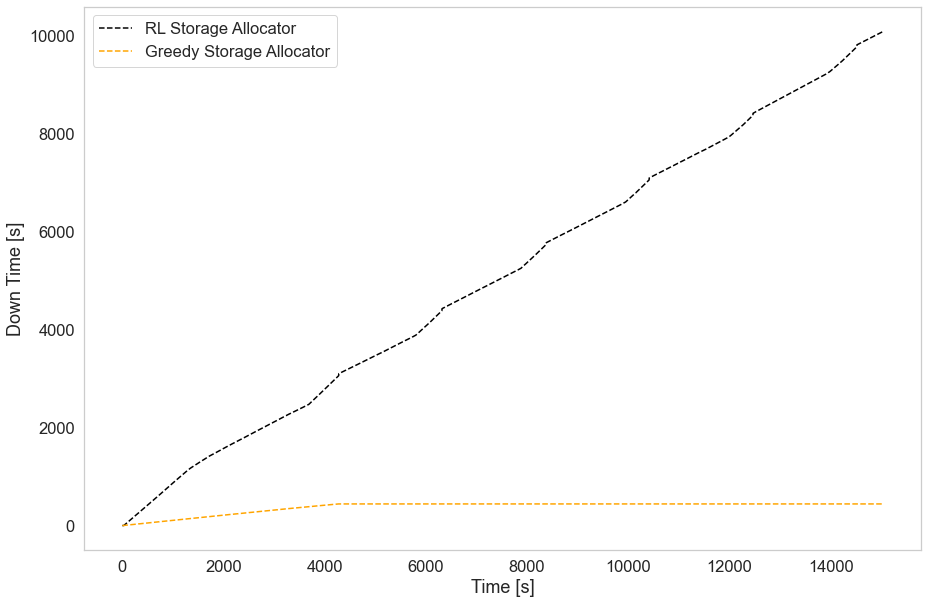

In [117]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('kafka_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper left')
#plt.plot(predicted_usage_data)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_downtime.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_downtime.pdf", dpi = 300)
plt.show()

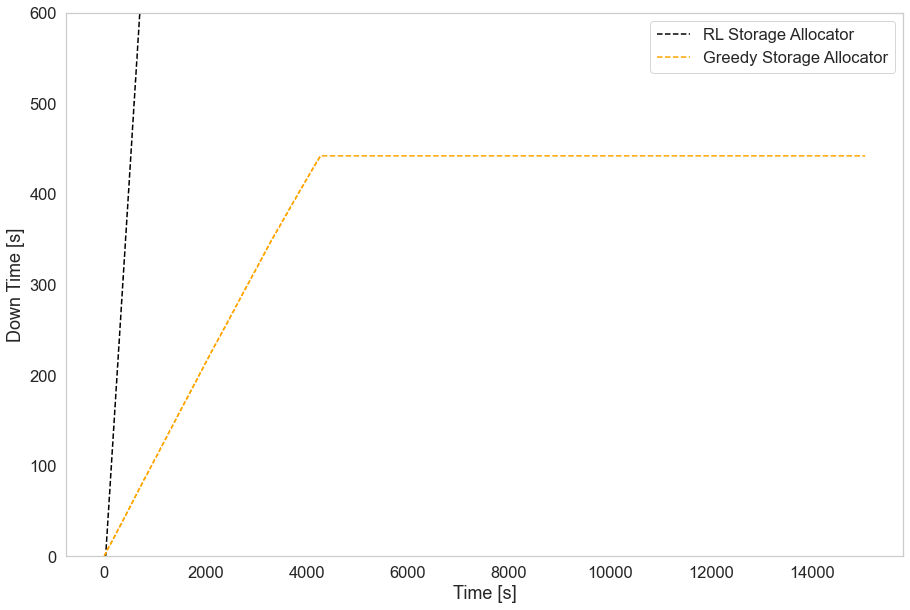

In [120]:
usecol = ["timeslot", "rl_downtime", "greedy_downtime"]
predicted_usage_data = pandas.read_csv('kafka_storage_allocation.csv', usecols=usecol, engine='python')
predicted_usage_data = predicted_usage_data.set_index("timeslot")
#dataset.head(7)
plt.figure(figsize=(15,10))
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Time [s]')
plt.ylabel('Down Time [s]')
plt.plot(predicted_usage_data['rl_downtime'], linestyle='--', color='black')
plt.plot(predicted_usage_data['greedy_downtime'], linestyle='--', color='orange')
plt.legend(['RL Storage Allocator', 'Greedy Storage Allocator'], loc='upper right')
#plt.plot(predicted_usage_data)
plt.ylim(0,600)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_downtime_emph.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\storage_allocator\kafka\kafka_downtime_emph.pdf", dpi = 300)
plt.show()